In [9]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

JSON_PATH = "all_results_cefr_lora.json"

with open(JSON_PATH, "r", encoding="utf-8") as f:
    results = json.load(f)

In [10]:
rows = []
for r in results:
    short_name = r["model"].split("/")[-1]  # biar label di x-axis lebih pendek

    for split in ["val", "test"]:
        m = r[split]
        rows.append({
            "model": short_name,
            "split": split,
            "accuracy": m["eval_accuracy"],
            "f1_macro": m["eval_f1_macro"],
        })

df = pd.DataFrame(rows)

order = (
    df[df["split"] == "test"]
    .sort_values("f1_macro", ascending=False)["model"]
    .tolist()
)
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)
df = df.sort_values("model")
df

,model,split,accuracy,f1_macro
2,roberta-base,val,0.642000,0.623390
3,roberta-base,test,0.603397,0.606842
4,bert-base-uncased,val,0.628000,0.597316
5,bert-base-uncased,test,0.616384,0.598086
6,distilbert-base-uncased,val,0.641000,0.622081
7,distilbert-base-uncased,test,0.627373,0.590909
0,deberta-v3-base,val,0.647000,0.612475
1,deberta-v3-base,test,0.608392,0.577907
8,xlm-roberta-base,val,0.658000,0.647321
9,xlm-roberta-base,test,0.607393,0.574293


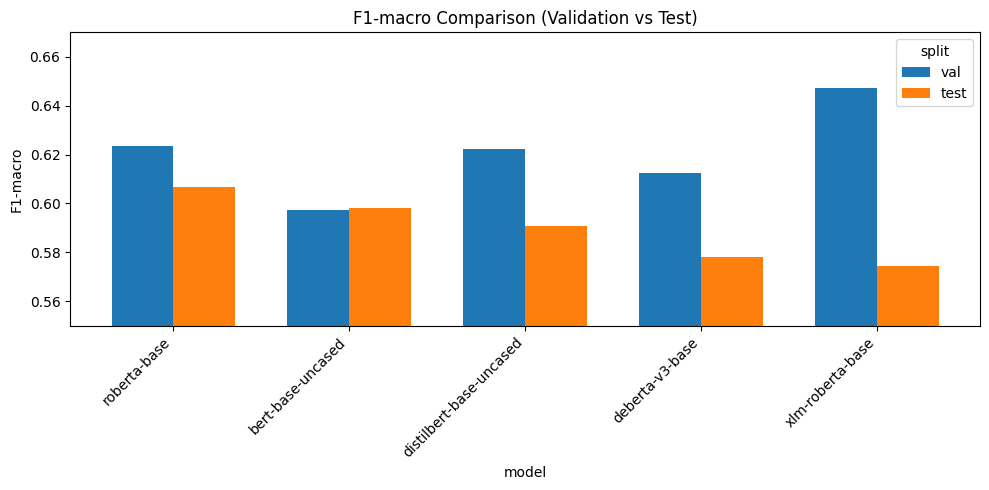

In [13]:
models = df["model"].cat.categories.tolist()
x = np.arange(len(models))
width = 0.35

val_scores = (
    df[df["split"] == "val"]
    .set_index("model")["f1_macro"]
    .reindex(models)
)
test_scores = (
    df[df["split"] == "test"]
    .set_index("model")["f1_macro"]
    .reindex(models)
)

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, val_scores, width, label="val")
ax.bar(x + width/2, test_scores, width, label="test")

ax.set_title("F1-macro Comparison (Validation vs Test)")
ax.set_xlabel("model")
ax.set_ylabel("F1-macro")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

ax.set_ylim(0.55, 0.67)

ax.legend(title="split")
plt.tight_layout()
plt.show()
